In [1]:
# http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016

In [8]:
import os
import sys

import pandas as pd
#import pandas_datareader.data as web
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [ ]:
# read the data

In [54]:
spy = pd.read_csv('SPY.csv', parse_dates = ['Date'])
spy = spy[['Date', 'Close']]
spy.columns = ['Date', 'SPY']
spy = spy.set_index('Date')
spy.head()

,SPY
Date,
2007-01-03,141.369995
2007-01-04,141.669998
2007-01-05,140.539993
2007-01-08,141.190002
2007-01-09,141.070007


In [57]:
msft = pd.read_csv('MSFT.csv', parse_dates = ['Date'])


In [58]:
msft = msft[['Date', 'Close']]

In [59]:
msft.columns = ['Date', 'MSFT']


In [60]:
msft = msft.set_index('Date')
msft.head()

,MSFT
Date,
2007-01-03,29.860001
2007-01-04,29.809999
2007-01-05,29.639999
2007-01-08,29.930000
2007-01-09,29.959999


In [62]:
tlt = pd.read_csv('TLT.csv', parse_dates = ['Date'])
tlt = tlt[['Date', 'Close']]
tlt.columns = ['Date', 'TLT']
tlt = tlt.set_index('Date')
tlt.head()

,TLT
Date,
2007-01-03,89.059998
2007-01-04,89.599998
2007-01-05,89.209999
2007-01-08,89.370003
2007-01-09,89.370003


In [65]:
# combine data
data = spy.join(msft, how = 'inner').join(tlt, how = 'inner')

In [66]:
data.head()

,SPY,MSFT,TLT
Date,,,
2007-01-03,141.369995,29.860001,89.059998
2007-01-04,141.669998,29.809999,89.599998
2007-01-05,140.539993,29.639999,89.209999
2007-01-08,141.190002,29.930000,89.370003
2007-01-09,141.070007,29.959999,89.370003


In [ ]:
# log returns

In [67]:
lrets = np.log(data/data.shift(1)).dropna()

In [ ]:
# staionary or not

In [ ]:
# white noise and random walk

In [69]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

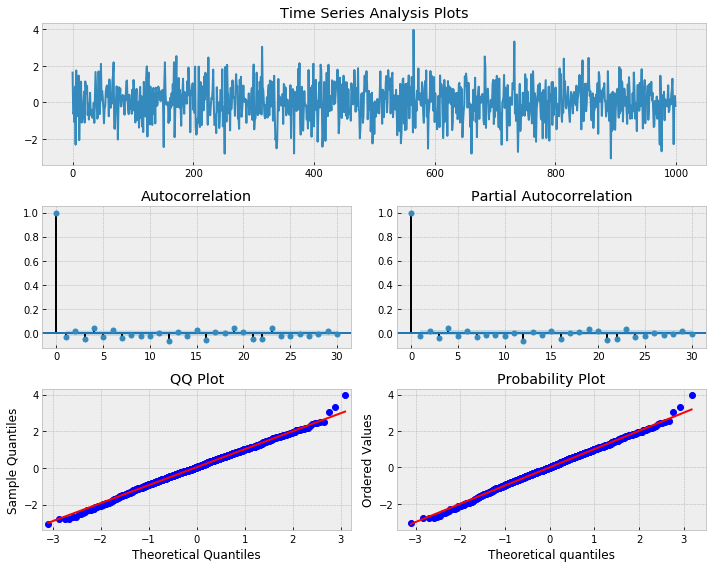

In [70]:
np.random.seed(1)

# plot of discrete white noise
randser = np.random.normal(size=1000)
tsplot(randser, lags=30)

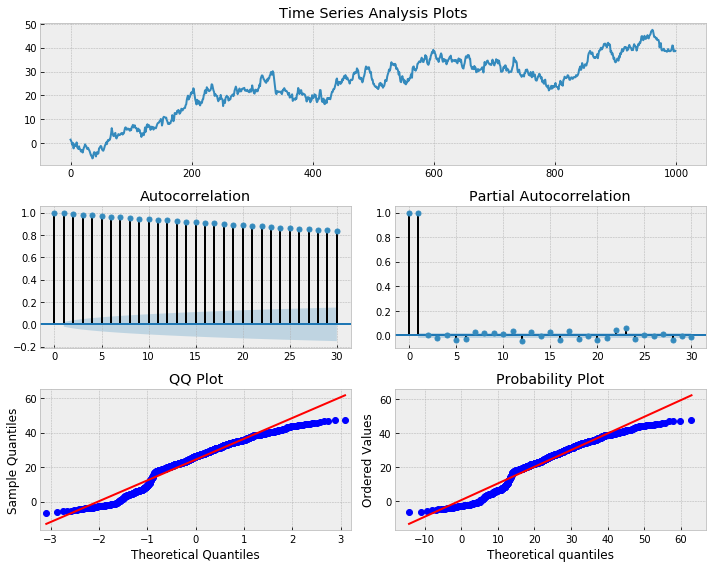

In [71]:
# Random Walk without a drift
np.random.seed(1)
n_samples = 1000

x = w = np.random.normal(size=n_samples)
for t in range(n_samples):
    x[t] = x[t-1] + w[t]

_ = tsplot(x, lags=30)

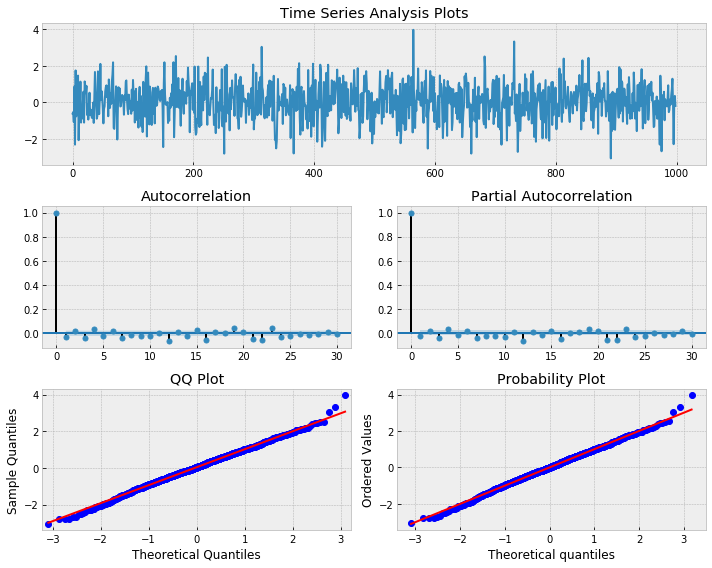

In [72]:
# First difference of simulated Random Walk series - white noise

_ = tsplot(np.diff(x), lags=30)

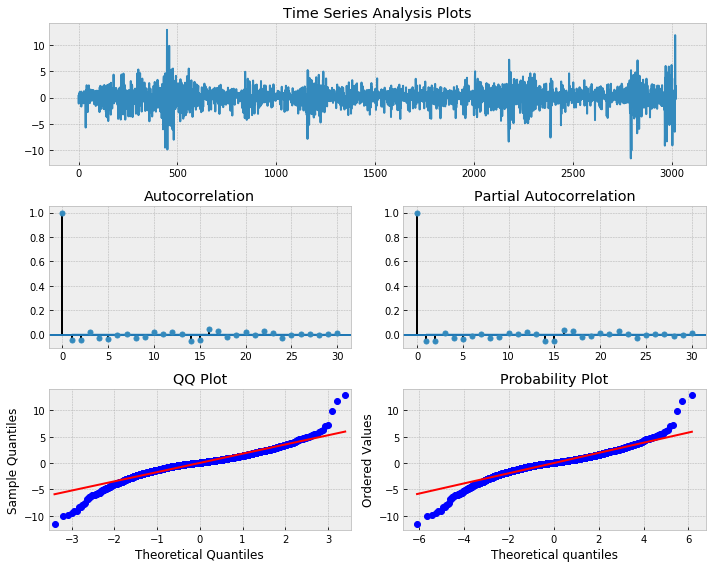

In [73]:
# First difference of SPY prices - similar to white noise, except heavy tails
_ = tsplot(np.diff(data.SPY), lags=30)

In [ ]:
# Linear Models

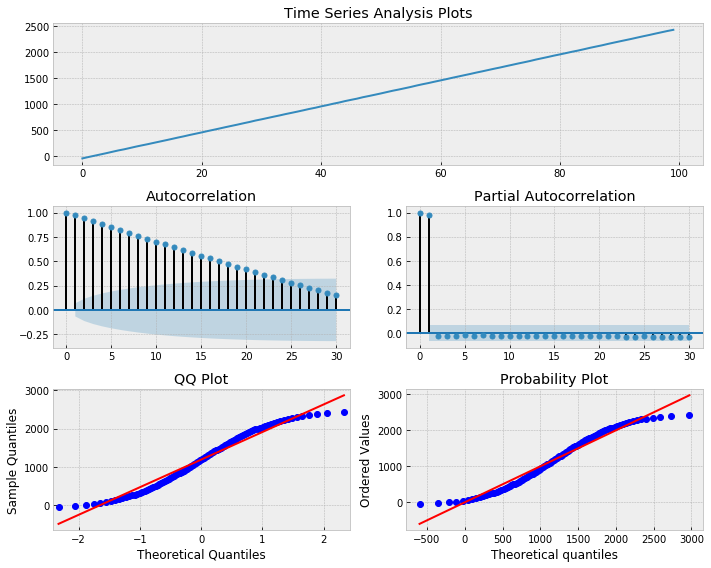

In [76]:
# simulate linear trend
# example Firm ABC sales are -$50 by default and +$25 at every time step

w = np.random.randn(100)
y = np.empty_like(w)

b0 = -50.
b1 = 25.
for t in range(len(w)):
    y[t] = b0 + b1*t + w[t]
    
_ = tsplot(y, lags=30) 

In [ ]:
# Log-Linear Models

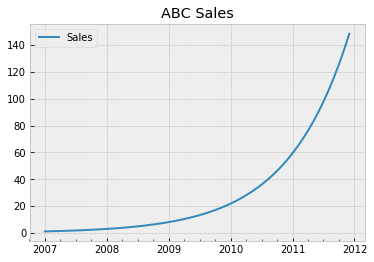

In [77]:
# Simulate ABC exponential growth

# fake dates
idx = pd.date_range('2007-01-01', '2012-01-01', freq='M')

# fake sales increasing at exponential rate
sales = [np.exp( x/12 ) for x in range(1, len(idx)+1)]

# create dataframe and plot
df = pd.DataFrame(sales, columns=['Sales'], index=idx)

with plt.style.context('bmh'):
    df.plot()
    plt.title('ABC Sales')

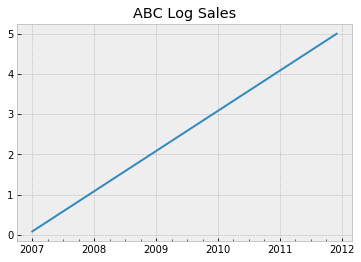

In [78]:
# ABC log sales 

with plt.style.context('bmh'):
    pd.Series(np.log(sales), index=idx).plot()
    plt.title('ABC Log Sales')